dx = 0.0100, dt = 0.0100, nt = 200


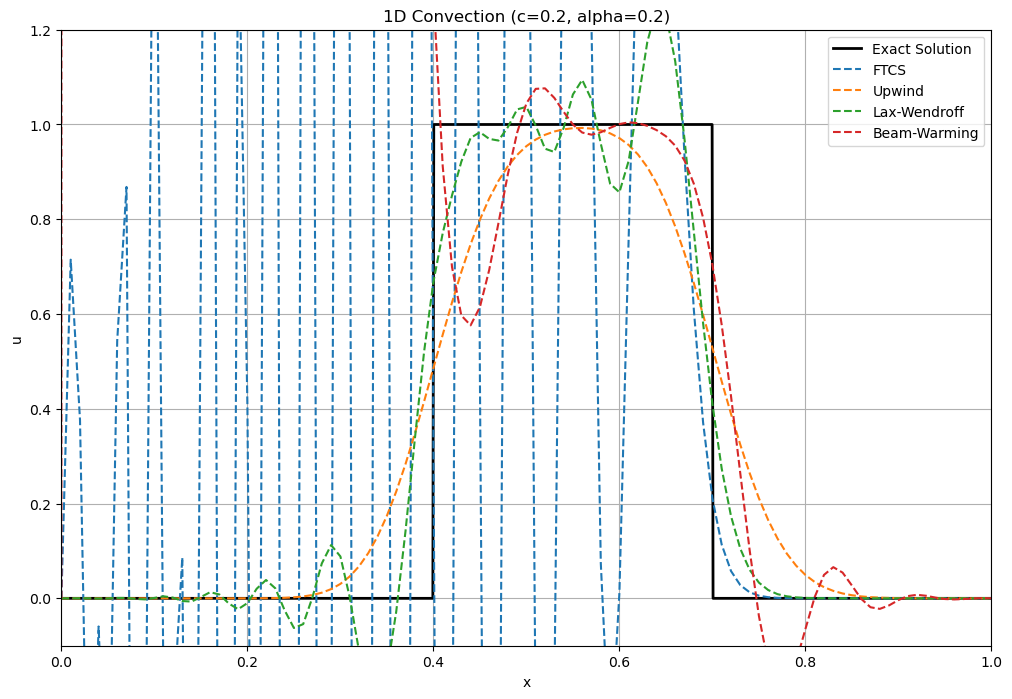

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
c = 0.2       # 对流速度
alpha = 0.2   # CFL数 (c*dt/dx)
x_min, x_max = 0.0, 1.0
nx = 100      # 空间网格数
dx = (x_max - x_min) / nx
dt = alpha * dx / c  # 时间步长
nt = int(2.0 / dt)   # 时间步数
print(f"dx = {dx:.4f}, dt = {dt:.4f}, nt = {nt}")

# 初始条件
x = np.linspace(x_min, x_max, nx+1)
u_init = np.where((x >= 0.0) & (x <= 0.3), 1.0, 0.0)

# 四种差分格式的求解
def solve_convection(u_init, scheme, nt):
    u = u_init.copy()
    un = np.zeros_like(u)
    for _ in range(nt):
        un = u.copy()
        if scheme == 'FTCS':
            # FTCS (不稳定！)
            u[1:-1] = un[1:-1] - 0.5 * alpha * (un[2:] - un[:-2])
        elif scheme == 'Upwind':
            # 迎风格式
            u[1:-1] = un[1:-1] - alpha * (un[1:-1] - un[:-2])
        elif scheme == 'Lax-Wendroff':
            # Lax-Wendroff
            u[1:-1] = un[1:-1] - 0.5 * alpha * (un[2:] - un[:-2]) + \
                      0.5 * alpha**2 * (un[2:] - 2*un[1:-1] + un[:-2])
        elif scheme == 'Beam-Warming':
            # Beam-Warming (二阶迎风)
            u[2:-1] = un[2:-1] - 0.5 * alpha * (3*un[2:-1] - 4*un[1:-2] + un[:-3]) + \
                      0.5 * alpha**2 * (un[2:-1] - 2*un[1:-2] + un[:-3])
        # 边界条件
        u[0] = 0.0  # 左边界固定为0
        if scheme == 'Beam-Warming':
            u[1] = u[2]  # Beam-Warming需要额外处理第二个点
    return u

# 计算数值解
schemes = ['FTCS', 'Upwind', 'Lax-Wendroff', 'Beam-Warming']
results = {}
for scheme in schemes:
    results[scheme] = solve_convection(u_init, scheme, nt)

# 理论解（精确解）
x_exact = np.linspace(x_min, x_max, 1000)
u_exact = np.where((x_exact >= c*nt*dt) & (x_exact <= 0.3 + c*nt*dt), 1.0, 0.0)

# 绘图
plt.figure(figsize=(12, 8))
plt.plot(x_exact, u_exact, 'k-', label='Exact Solution', linewidth=2)
for scheme in schemes:
    plt.plot(x, results[scheme], '--', label=scheme, linewidth=1.5)
plt.xlim(0, 1)
plt.ylim(-0.1, 1.2)
plt.xlabel('x')
plt.ylabel('u')
plt.title(f'1D Convection (c={c}, alpha={alpha})')
plt.legend()
plt.grid()
plt.show()